
# Importation

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Création de données

In [3]:
X = np.array([[0,0], [1,0], [2,0], [3,0], [0.5,1], [1.5,1], [2.5,1], [3.5,1]])
y = [0, 0, 0, 0, 1, 1, 1, 1]

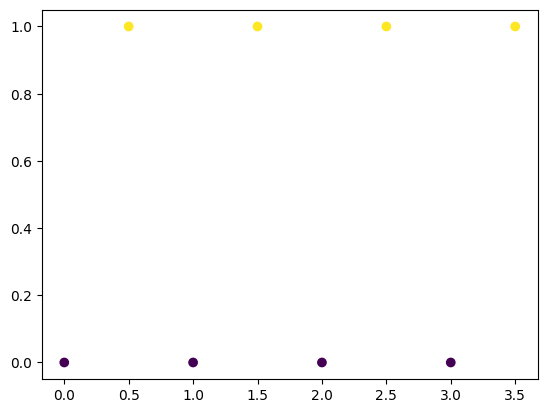

In [4]:
plt.scatter(X[:, 0],X[:, 1],c=y)

# Arbre de décision

In [5]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X, y)

DecisionTreeClassifier()

In [6]:
max_depth = clf.get_depth()
print(max_depth)

1


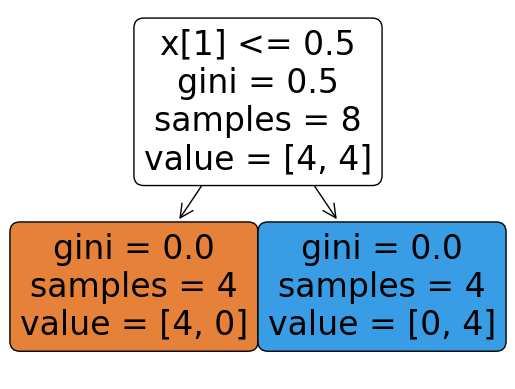

In [13]:
from sklearn import tree
tree.plot_tree(clf,rounded=True,filled=True)
plt.show()

# Utilisation d'entropie

In [14]:
clf = DecisionTreeClassifier(criterion = "entropy")
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

In [15]:
max_depth = clf.get_depth()
print(max_depth)

1


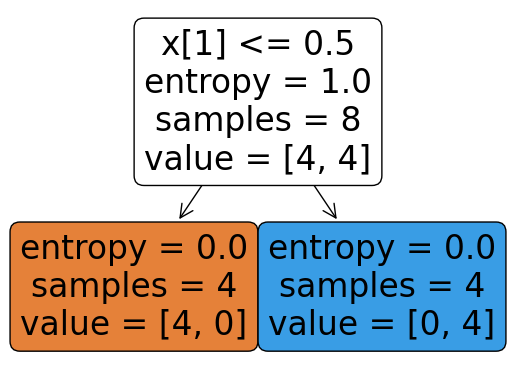

In [16]:
from sklearn import tree
tree.plot_tree(clf,rounded=True,filled=True)
plt.show()

# Création d'un nouveau dataset avec sklearn

In [17]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=2000000, centers=2, n_features=2,random_state=0)

# Phase d'entrainement

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 101)

In [19]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [20]:
%%time
clf.fit(X_train, y_train)

CPU times: user 14.4 s, sys: 46.9 ms, total: 14.4 s
Wall time: 14.5 s


DecisionTreeClassifier()

In [21]:
max_depth = clf.get_depth()
print(max_depth)

81


# Phase de test

In [25]:
y_pred= clf.predict(X_test)

In [26]:
from sklearn import metrics

In [28]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94    400052
           1       0.94      0.94      0.94    399948

    accuracy                           0.94    800000
   macro avg       0.94      0.94      0.94    800000
weighted avg       0.94      0.94      0.94    800000



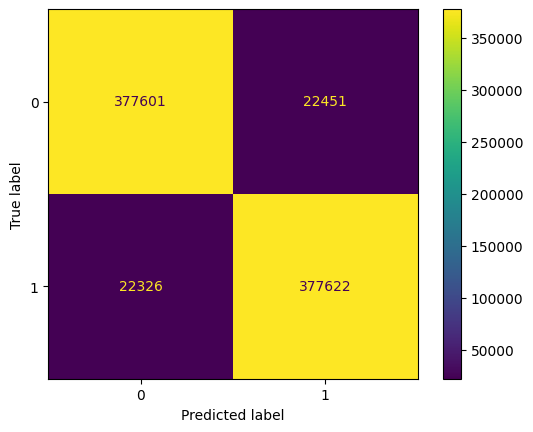

In [31]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()

#  Avec entropie

In [32]:
clf = DecisionTreeClassifier(criterion = "entropy")

In [33]:
%%time
clf.fit(X_train, y_train)

CPU times: user 17 s, sys: 36 ms, total: 17 s
Wall time: 18.2 s


DecisionTreeClassifier(criterion='entropy')

In [34]:
max_depth = clf.get_depth()
print(max_depth)

85


# Phase de test

In [35]:
y_pred = clf.predict(X_test)

In [36]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94    400052
           1       0.94      0.94      0.94    399948

    accuracy                           0.94    800000
   macro avg       0.94      0.94      0.94    800000
weighted avg       0.94      0.94      0.94    800000



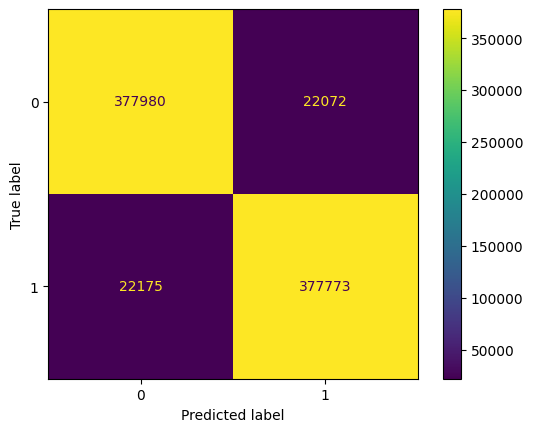

In [37]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()

# Création de nouveau dataset (imbalance)

In [38]:
from imblearn.datasets import make_imbalance

In [39]:
X, y = make_blobs(n_samples=200000, centers=2, n_features=3,random_state=0)
X, y = make_imbalance(X, y, sampling_strategy={0: 100000, 1: 10000}, random_state=42)

In [40]:
import seaborn as sns
sns.countplot(y)

<Axes: ylabel='count'>

Error in callback <function flush_figures at 0x795ad2eb41f0> (for post_execute):


KeyboardInterrupt: 

# Phase d'entrainement

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 101)

In [42]:
clf = DecisionTreeClassifier()

In [43]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [44]:
max_depth = clf.get_depth()
print(max_depth)

13


# Phase de test

In [46]:
y_pred = clf.predict(X_test)

In [48]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     40068
           1       0.99      0.99      0.99      3932

    accuracy                           1.00     44000
   macro avg       0.99      0.99      0.99     44000
weighted avg       1.00      1.00      1.00     44000



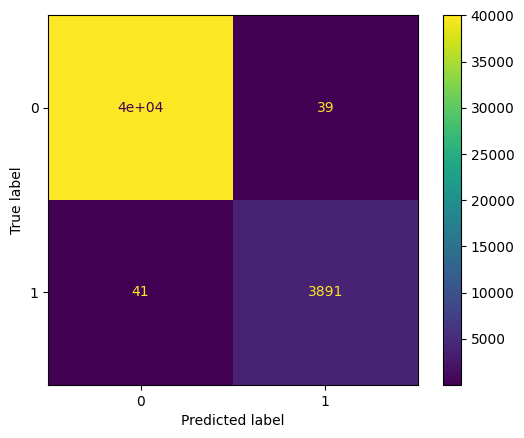

In [49]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()

# Avec entropie

In [50]:
clf = DecisionTreeClassifier(criterion = "entropy")

In [51]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [52]:
max_depth = clf.get_depth()
print(max_depth)

16


# phase de test

In [53]:
y_pred = clf.predict(X_test)

In [55]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     40068
           1       0.99      0.99      0.99      3932

    accuracy                           1.00     44000
   macro avg       1.00      1.00      1.00     44000
weighted avg       1.00      1.00      1.00     44000



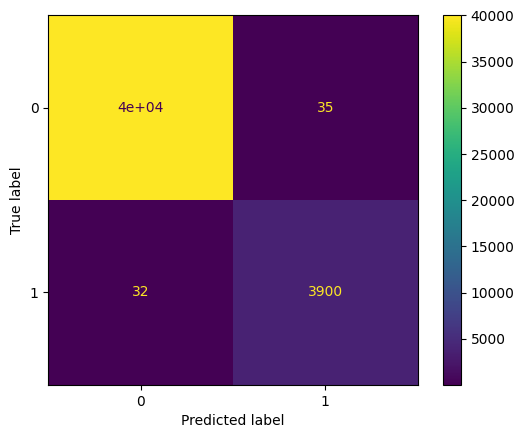

In [56]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()

# exemple que je crée

In [100]:
# X, y = make_blobs(n_samples=25, centers=2, n_features=3, random_state=0)
# X, y = make_imbalance(X, y, sampling_strategy={0: 20, 1: 5}, random_state=42)

from sklearn.datasets import make_moons
X, y = make_moons(n_samples=50, noise=1, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 101)

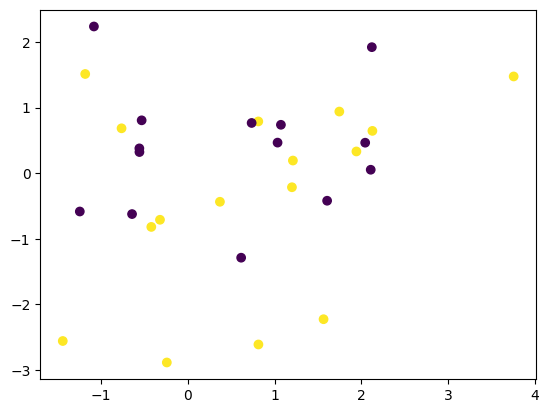

In [101]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)

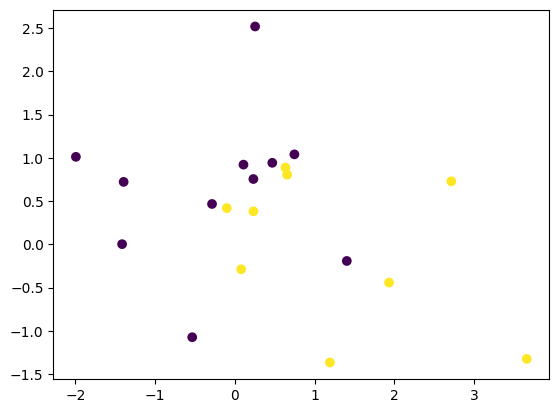

In [102]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)

In [103]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [104]:
max_depth = clf.get_depth()
print(max_depth)

9


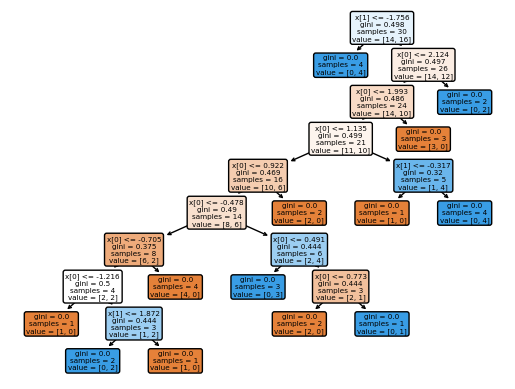

In [105]:
tree.plot_tree(clf,rounded=True,filled=True)
plt.show()

In [107]:
y_pred = clf.predict(X_test)

In [108]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.45      0.50        11
           1       0.45      0.56      0.50         9

    accuracy                           0.50        20
   macro avg       0.51      0.51      0.50        20
weighted avg       0.51      0.50      0.50        20



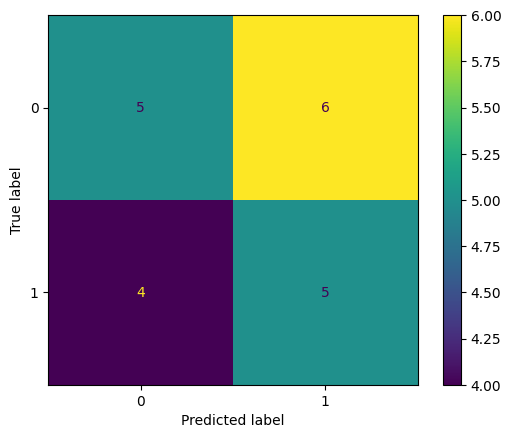

In [109]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()

In [111]:
clf = DecisionTreeClassifier()

from sklearn.model_selection import GridSearchCV

grid_param={"criterion":["gini", "entropy"],
            "max_depth": range(1,10,1),
            "min_samples_leaf": range(1,15,1),
            "min_samples_split": range(2,50,1)}

grid_search = GridSearchCV(estimator=clf, param_grid=grid_param,n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 15),
                         'min_samples_split': range(2, 50)})

In [112]:
print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 5, 'min_samples_split': 2}


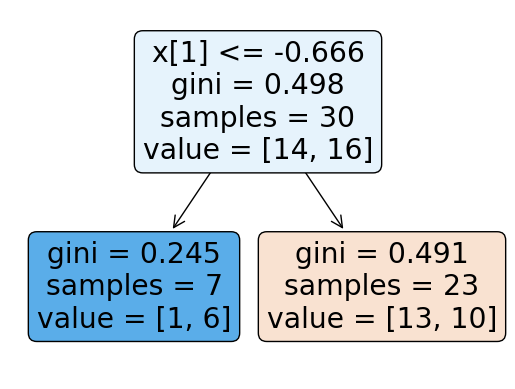

In [113]:
clf = DecisionTreeClassifier(criterion = "gini", max_depth = 1, min_samples_leaf = 5, min_samples_split = 2)
clf.fit(X_train, y_train)
tree.plot_tree(clf,rounded=True,filled=True)
plt.show()

In [114]:
y_pred = clf.predict(X_test)

In [115]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.91      0.71        11
           1       0.67      0.22      0.33         9

    accuracy                           0.60        20
   macro avg       0.63      0.57      0.52        20
weighted avg       0.62      0.60      0.54        20



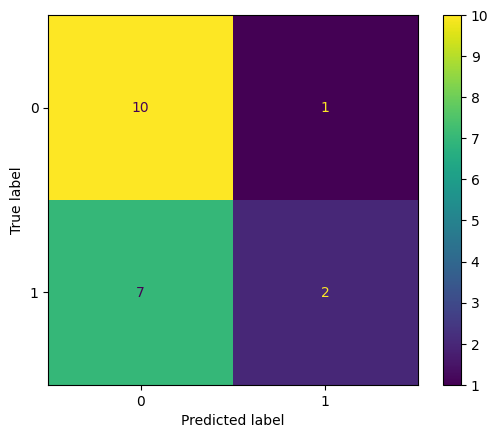

In [116]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()